# Deep Learning

Neural networks(short for Artificial neural networks) model were inspired by the structure of neurons in our brain(biological neural networks).

Each cell in a neural network is called a neuron and is connected to multiple neurons. Neurons in human (and mammalian) brains communicate by sending electrical signals between each other.

<img src = "Images/NN.jpg">

But these are the only similarities between the biological neural networks and artificial neural networks.

## Deep Neural Network

A deep neural network is a specific type of neural network that excels at capturing nonlinear relationships in data. Deep neural networks have broken many benchmarks in audio and image classification. Previously, linear models were often used with nonlinear transformations that were discovered by hand through research.

<Img src = "Images/Non_linear.jpg">

Deep neural networks have some ability to discover how to structure the nonlinear transformations during the training process automatically and have grown to become a helpful tool for many problems.


## Graphs
2.Neural networks are usually represented as graphs. A graph is a data structure that consists of nodes (represented as circles) that are connected by edges (represented as lines).

<Img src = "Images/Graph.jpg">

Graphs are commonly used to represent how components of a system are related or linked. For example, the Facebook Social Graph describes how all of the users on Facebook are connected to each other (and this graph is changing constantly as friends are added and removed). Google Maps uses graphs to represent locations in the physical world as nodes and roads as edges.

<Img src = "Images/Graph_FB_Google.jpg">

Graphs are a highly flexible data structure; you can even represent a list of values as a graph. Graphs are often categorized by their properties, which act as constraints


<Img src = "Images/Graph_Type.jpg">


3.
Graphs provide a mental model for thinking and reasoning about a specific class of models -- those that consist of a series of functions that are executed in a specific order. In the context of neural networks, graphs let us compactly express a pipeline of functions that we want to be executed in succession.

This pipeline has 2 stages of functions that happen in sequence:

* In the first stage L1 is computed L1 = X * a1
* In the second stage L2 is computed L2 = L1 * a2

The second stage can't happen without the first stage, because 
**L1** is an input to the second stage. The heart of neural network models is the successive computation of functions. This is known as a **computational graph**. A computational graph uses nodes to describe variables and edges to describe how variables are combined.

Here's a simple example:

y = a1x1 + a2x2

<Img src = "Images/x1a1_x2a2_y.jpg">

The computational graph is a powerful representation, as it allows us to compactly represent models with many layers of nesting. In fact, a decision tree is really a specific type of computational graph. There's no compact way to express a decision tree model using just equations and standard algebraic notation

<Img src = "Images/DT_Grp.jpg">


Linear regression is represented as:

y = a0 + a1x1 + a2x2 + .... + anxn

Where:
* a0 represents the intercept(also know as the bias)
* a1 to an represent the trained model weights
* x1 to xn represent the features
* y represents the predicted value

The first step is to rewrite this model using linear algebra notation, as a product of 2 vectors:

Xa^T= y

<Img src = "Images/vector_prod.jpg">

**Neural Network Representation**

In the neural network representation of this model:

* each feature column in a data set is represented as an **input neuron
* each weight value is represented as an arrow from the feature column it multiples to the **output neuron

The neurons and arrows act as a visual metaphor for the weighted sum, which is how the feature columns and weights are combined.

<Img src = "Images/neuron.jpg">

Inspired by biological neural networks, an **activation function** determines if the neuron fires or not. In a neural network model, the activation function transforms the weighted sum of the input values. For this network, the activation function is the identity function. The identity function returns the same value that was passed in:

f(x) = x

<Img src = "Images/AF.jpg">


While the activation function isn't interesting for a network that performs linear regression, it's useful for logistic regression and more complex networks. Here's a comparison of both representations of the same linear regression model:


<Img src = "Images/LinearAlg_NN2.jpg">


6.
Because the inputs from one layer of neurons feed to the next layer of the single, output neuron, this is known as a **feedforward network**. In the language of graphs, a feedforward network is a **directed, acyclic graph.**

**Fitting A Network**
In the Linear Regression for Machine Learning course, we explored two different approaches to training a linear regression model: gradient descent and ordinary least squares. Gradient descent is the most common technique for fitting neural network models.



In [11]:
import pandas as pd
from sklearn.datasets import make_regression
import numpy as np
data = make_regression(n_samples=100, n_features=3, random_state=1)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

In [12]:
features['bias'] = 1

In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
def train(features,labels):
    lr = SGDRegressor()
    lr.fit(features, labels)
    weights = lr.coef_
    return weights

In [15]:
def feedforward(features,weights):
    predictions = np.dot(features,weights.T)
    return predictions


In [16]:
train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)

# NonLinear Activation Functions

The three most commonly used activation functions in neural networks are:

* the sigmoid function
* the ReLU function
* the tanh function

## ReLU activation function

The **ReLU** activation function, which is a commonly used activation function in neural networks for solving regression problems. ReLU stands for **rectified linear unit** and is defined as follows:

**ReLU(x) = max(0,x)**

The max(0,x) function call returns the maximum value between 0 and 
x.
This means that:

* when x is less than 0 the value 0 is returned
* when x is greater than 0 the value x is returned

The ReLU function returns the positive component of the input value. Let's visualize the expressivity of a model that performs a linear combination of the features and weights followed by the ReLU transformation:


<img src = "GIF/ReLU.gif">



x= [-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
relu_y= [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10526316 0.31578947
 0.52631579 0.73684211 0.94736842 1.15789474 1.36842105 1.57894737
 1.78947368 2.        ]


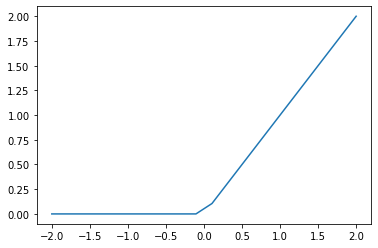

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 20)

def relu(values):
    return np.maximum(values,0)

relu_y = relu(x)

print("x=",x)
print("relu_y=",relu_y)

plt.plot(x,relu_y)

## tanh Function

<img src = "images/tan.jpg">

Linking the unit circle with the Cartesian coordinate system tan is just the ratio between the **y value (opposite)** and the **x value (adjacent)** for a point on the unit circle corresponding to the angle.

### Plotting Tan

To plot the tangent function, we need to use radians on the x-axis instead of degrees. To describe a full trip around the circle, radians range from 0 to 2π while degrees range from 0 to 360.


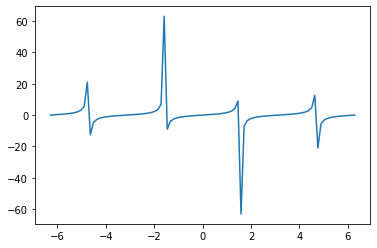

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
tan_y = np.tan(x)
plt.plot(x, tan_y)

The periodic sharp spikes that you see in the plot are known as **vertical asymptotes**. At those points, the value isn't defined but the limit approaches either negative or positive infinity (depending on which direction you're approaching the x value from).

The key takeaway from the plot is how the tangent function is a repeating, **periodic function**. A periodic function is one that returns the same value at regular intervals.

The **tangent function** repeats itself every π, which is known as the **period**. The tangent function isn't known to be used as an activation function in neural networks (or any machine learning model really) because the periodic nature isn't a pattern that's found in real datasets.

While there have been some experiments with periodic functions as the activation function for neural networks, the general conclusion has been that **period functions like tangent don't offer any unique benefits for modeling**.

Generally speaking, the activation functions that are used in neural networks are increasing functions. An increasing function **f** is a function where **f(x)** always stays the **same or increases** as **x increases**.


While the tangent function describes the ratio of the y and x values on the unit circle, the **hyperbolic tangent function** describes the **ratio of y and x values on the unit hyperbola**.

<img src="Images/Hyper_Tan.jpg">

Use the **numpy.tanh()** function to compute the hyperbolic tangent of the values in x


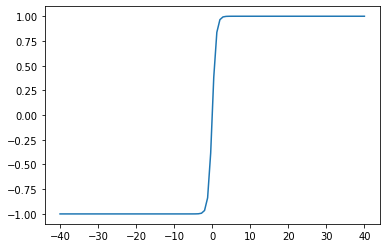

In [9]:
x = np.linspace(-40, 40, 100)
tanh_y = np.tanh(x)
plt.plot(x, tanh_y)

You'll notice that like the sigmoid function, the **tanh function** has **horizontal asymptotes** as x approaches negative or positive infinity. In addition, the tanh function also **constrains the range (y) to between −1 and 1**.

Because of this property, both the **sigmoid** and the **tanh functions** are commonly used in neural networks for **classification tasks**.

**ReLU function**, on the other hand, is known to be more effective in **regression tasks**



# Hidden Layers

In the above cells we worked with **single layer neural networks**. 
These networks had a single layer of neurons. To make a prediction, a single layer of neurons in these networks directly fed their results into the output neuron(s).

We'll explore how **multi-layer networks** (also known as **deep neural networks**) are able to **better capture nonlinearity** in the data.

In a deep neural network, the first layer of input neurons feeds into a second, intermediate layer of neurons.

<img src="Images/Hidden_Layers.jpg">

The intermediate layers are known as **hidden layers**, because they aren't directly represented in the input data or the output predictions. Instead, we can think of each hidden layer as intermediate features that are learned during the training process.

## Decision Tree Vs Deep Neural Network

Neural Networks are actually very similar to how decision trees are structured. The branches and splits represent some intermediate features that are useful for making predictions and are analogous to the hidden layers in a neural network.

<img src="Images/DT_NN.jpg">

Each of these hidden layers has its own set of weights and biases, which are discovered during the training process. In decision tree models, the intermediate features in the model represented something more concrete we can understand (feature ranges).

**Decision tree models** are referred to as white box models because they can be observed and understood but not easily altered. After we train a decision tree model, we can visualize the tree, interpret it, and have new ideas for tweaking the model.

**Neural networks**, on the other hand, are much closer to being a black box. In a black box model, we can understand the inputs and the outputs but the intermediate features are actually difficult to interpret and understand. Even harder and perhaps more importantly, it's difficult to understand how to tweak a neural network based on these intermediate features.

We'll learn how adding more layers to a network and adding more neurons in the hidden layers can improve the model's ability to learn more complex relationships

To generate **data with nonlinearity in the features** (both between the features and between the features and the target column), we can use the **make_moons()** function from scikit-learn:

In [10]:
from sklearn.datasets import make_moons
data = make_moons()

By default, make_moons() will generate 100 rows of data with 2 features. Here's a plot that visualizes one feature against the other